In [1]:
import collections
import json
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style("whitegrid")

In [3]:
df = pd.read_json("output/output_1594332187.json")

In [4]:
df.shape

(1000, 18)

In [5]:
df.dtypes

current_timestamp          int64
name                      object
full_name                 object
fork                        bool
clone_url                 object
stargazers_count           int64
language                  object
default_branch            object
commit_sha                object
number_of_dockerfiles      int64
languages                 object
contributors               int64
number_of_commits          int64
age_days                   int64
build_tools               object
info_from_dockerfiles     object
tag_name                  object
has_modules              float64
dtype: object

In [6]:
df.head()

,current_timestamp,name,full_name,fork,clone_url,stargazers_count,language,default_branch,commit_sha,number_of_dockerfiles,languages,contributors,number_of_commits,age_days,build_tools,info_from_dockerfiles,tag_name,has_modules
0,1594332218,CS-Notes,CyC2018/CS-Notes,False,https://github.com/CyC2018/CS-Notes.git,105705,Java,master,1392056d73b28a15a17e2937df4129d09fc24e07,0,{'Java': 1367509},231,3641,877,NaN,NaN,NaN,NaN
1,1594332237,JavaGuide,Snailclimb/JavaGuide,False,https://github.com/Snailclimb/JavaGuide.git,83555,Java,master,ced8ec2ee40a2d3bbe029e9addf1c3e85ce07b4f,0,{'Java': 28355},184,2436,794,NaN,NaN,NaN,NaN
2,1594332243,mall,macrozheng/mall,False,https://github.com/macrozheng/mall.git,37897,Java,master,87d3f38f242a9ece8a6e61a9d05e66c32f525787,0,"{'Java': 2746787, 'TSQL': 219343, 'Shell': 1433}",2,512,827,[Maven],NaN,NaN,NaN
3,1594332249,spring-boot-examples,ityouknow/spring-boot-examples,False,https://github.com/ityouknow/spring-boot-examp...,22807,Java,master,3f7e0916d9a5faf32572a6a20474e3b6e4fa375b,2,"{'Java': 229057, 'HTML': 21607, 'TSQL': 3442, ...",6,165,1342,[Maven],[{'path': './dockercompose-springboot-mysql-ng...,NaN,NaN
4,1594332253,GitHub-Chinese-Top-Charts,kon9chunkit/GitHub-Chinese-Top-Charts,False,https://github.com/kon9chunkit/GitHub-Chinese-...,22469,Java,master,57a91031921c16fe3d1360cb3f9c28f4a7d04b43,0,{'Java': 323066},1,47,308,NaN,NaN,NaN,NaN


### Repositories with no dockerfiles 

In [7]:
(df["number_of_dockerfiles"] == 0).sum()

420

### Repositories with at least one dockerfile

In [8]:
(df["number_of_dockerfiles"] > 0).sum()

580

### Dockerfile distribution over repositories

In [9]:
number_of_dockerfiles_in_repos = df["number_of_dockerfiles"].sort_values().unique()
cols = ["number_of_dockerfiles", "number_of_repos"]
dockerfile_vs_repo_df = pd.DataFrame(columns = cols)
for n in number_of_dockerfiles_in_repos:
    dockerfile_vs_repo_df = dockerfile_vs_repo_df.append(
        {"number_of_dockerfiles": pd.to_numeric(n), "number_of_repos": len(df[df["number_of_dockerfiles"] == pd.to_numeric(n)])},
        ignore_index=True)
dockerfile_vs_repo_df.to_csv(r'analysis_output/dockerfiles_vs_repos.csv', index=False)
dockerfile_vs_repo_df

,number_of_dockerfiles,number_of_repos
0,0,420
1,1,314
2,2,78
3,3,37
4,4,29
5,5,20
6,6,15
7,7,17
8,8,12
9,9,15


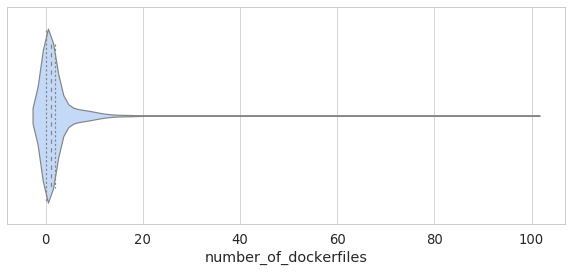

In [10]:
sns.set_context("paper", font_scale=1.5)
fig, ax = plt.subplots(figsize=(10,4))
plt.xlabel('number of dockerfiles')
ax = sns.violinplot(x="number_of_dockerfiles", data=df, color="#bbd7ff", inner="quartile")

### Most dockerfiles in a repository

In [11]:
df[df["number_of_dockerfiles"] == df["number_of_dockerfiles"].max()]

,current_timestamp,name,full_name,fork,clone_url,stargazers_count,language,default_branch,commit_sha,number_of_dockerfiles,languages,contributors,number_of_commits,age_days,build_tools,info_from_dockerfiles,tag_name,has_modules
784,1594339185,Hands-On-Microservices-with-Spring-Boot-and-Sp...,PacktPublishing/Hands-On-Microservices-with-Sp...,False,https://github.com/PacktPublishing/Hands-On-Mi...,111,Java,master,595feae17383a9cdd831b83691c9cddf1140e487,99,"{'Java': 1995419, 'Shell': 213596, 'Dockerfile...",4,47,652,[Gradle],[{'path': './Chapter12/microservices/review-se...,NaN,NaN


### Total number of Dockerfiles

In [12]:
df["number_of_dockerfiles"].sum()

2071

### Repositories that are forks

In [13]:
(df["fork"] == True).sum()

0

### Repositories with releases

In [14]:
(df["tag_name"].notnull()).sum()

434

### Repositories without releases

In [15]:
(df["tag_name"].isnull()).sum()

566

### Build tools vs repositories

In [16]:
build_tools = df["build_tools"].str.len().unique()
for i in range(len(build_tools)):
    if np.isnan(build_tools[i]):
        build_tools[i] = 0
build_tools = build_tools.astype(int)
build_tools

array([0, 1, 2, 3])

In [17]:
build_tool_df = pd.DataFrame({"build_tools": df["build_tools"].str.len()})
build_tool_df.fillna(0, inplace = True)

In [18]:
cols = ["number_of_build_tools", "number_of_repos"]
build_tool_vs_repo_df = pd.DataFrame(columns = cols)
for n in build_tools:
    build_tool_vs_repo_df = build_tool_vs_repo_df.append(
        {"number_of_build_tools": n, "number_of_repos": len(df[build_tool_df["build_tools"] == n])},
        ignore_index=True)
build_tool_vs_repo_df.to_csv(r'analysis_output/build_tools_vs_repos.csv', index=False)
build_tool_vs_repo_df

,number_of_build_tools,number_of_repos
0,0,26
1,1,877
2,2,90
3,3,7


### Repositories with gitmodules

In [19]:
(df["has_modules"] == True).sum()

37

### Default branches

In [20]:
branches = df["default_branch"]
branches.value_counts()

master                                                                     924
develop                                                                     29
dev                                                                         12
main                                                                         9
development                                                                  4
v6.2.3-strapdata                                                             1
5.3                                                                          1
maintenance                                                                  1
version4                                                                     1
integration                                                                  1
https/github.com/MyCATApache/Mycat-Server/tree/Mycat-server-1.6.76-test      1
siv/develop                                                                  1
latest                                              

### Dockerfile analysis

In [21]:
repos_with_docker_df = df[pd.notnull(df['info_from_dockerfiles'])]
repos_with_docker_df.reset_index(drop=True, inplace=True)
repos_with_docker_df.shape

(580, 18)

In [22]:
list_of_base_images = []
for index, row in repos_with_docker_df.iterrows():
    for i in range(len(row['info_from_dockerfiles'])):
        for j in range(len(row['info_from_dockerfiles'][i]['base_images'])):
            list_of_base_images.append(row['info_from_dockerfiles'][i]['base_images'][j])

In [23]:
for i in range(len(list_of_base_images)):
    list_of_base_images[i] = re.sub('FROM', '',list_of_base_images[i], flags=re.IGNORECASE)
    list_of_base_images[i] = re.sub(r'( AS).*', '',list_of_base_images[i], flags=re.IGNORECASE)
    list_of_base_images[i] = " ".join(list_of_base_images[i].split())
len(list_of_base_images)

2295

In [24]:
base_image_df = pd.DataFrame(list_of_base_images, columns = ['base_image'])

In [25]:
base_image_df.head()

,base_image
0,maven:3.5-jdk-8
1,openjdk:8-jdk-alpine
2,openjdk:8-jdk-alpine
3,openjdk:8u232-jre-stretch
4,openjdk:8-jdk-alpine


In [26]:
base_image_df.shape

(2295, 1)

In [27]:
len(base_image_df['base_image'].unique())

692

### Most popular base-image:versions

In [28]:
base_images_with_versions_df = pd.Series(list_of_base_images).value_counts().to_frame()
base_images_with_versions_df.reset_index(inplace=True)
base_images_with_versions_df.columns = ['base-image:version', 'count']
base_images_with_versions_df.to_csv(r'analysis_output/base_image_version_count.csv', index=False)

In [29]:
base_images_with_versions_df.shape

(692, 2)

In [30]:
base_images_with_versions_df.dtypes

base-image:version    object
count                  int64
dtype: object

In [31]:
base_images_with_versions_df.head(30)

,base-image:version,count
0,java:8,112
1,openjdk:8-jdk-alpine,106
2,openjdk:12.0.2,97
3,java:8-jre,70
4,openjdk:8-jre-alpine,67
5,openjdk:8-jre,44
6,frolvlad/alpine-oraclejdk8:slim,38
7,java:8-jre-alpine,35
8,openjdk:8,35
9,busybox:latest,28


In [32]:
top_25_df = base_images_with_versions_df[:25].copy()

In [33]:
top_25_df["count"].sum()

929

In [34]:
mypalette = []
for i in range(25):
    if ("java" in top_25_df["base-image:version"][i] or "openjdk" in top_25_df["base-image:version"][i]) and "/" not in top_25_df["base-image:version"][i]:
        mypalette.append("#5382A1")
    elif "ubuntu" in top_25_df["base-image:version"][i]:
        mypalette.append("#E95420")
    else:
        mypalette.append("#FFC425")

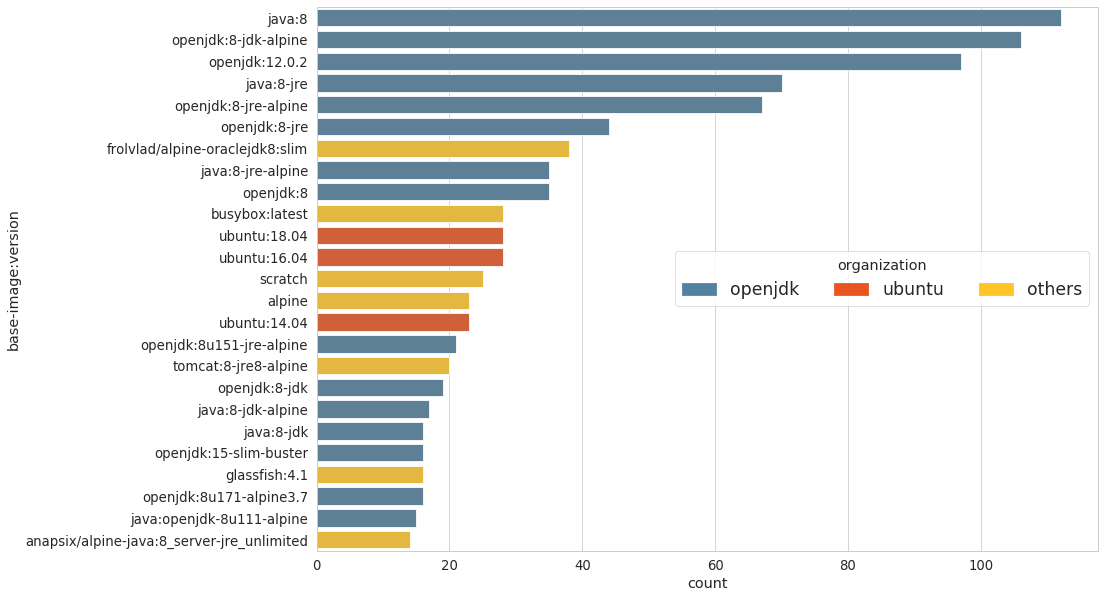

In [35]:
plt.figure(figsize=(14, 10))
ax = sns.barplot(x="count", y="base-image:version", data=top_25_df[:25], palette=mypalette)
openjdk_patch = mpatches.Patch(color='#5382A1', label='openjdk')
ubuntu_patch = mpatches.Patch(color='#E95420', label='ubuntu')
others_patch = mpatches.Patch(color='#FFC425', label='others')
plt.legend(handles=[openjdk_patch, ubuntu_patch, others_patch], title='organization', loc='center right', ncol=3, fontsize="large", frameon=True)

### Base images with Java preinstalled

In [36]:
# ´python find_java_versions.py´
top_25_java_df = pd.read_csv("analysis_output/base_image_version_count_java.csv")
top_25_java_df.fillna('', inplace=True)
top_25_java_df

,base-image:version,count,java_version
0,java:8,112,"openjdk version ""1.8.0_111"""
1,openjdk:8-jdk-alpine,106,"openjdk version ""1.8.0_212"""
2,openjdk:12.0.2,97,"openjdk version ""12.0.2"""
3,java:8-jre,70,"openjdk version ""1.8.0_111"""
4,openjdk:8-jre-alpine,67,"openjdk version ""1.8.0_212"""
5,openjdk:8-jre,44,"openjdk version ""1.8.0_252"""
6,frolvlad/alpine-oraclejdk8:slim,38,
7,openjdk:8,35,"openjdk version ""1.8.0_252"""
8,java:8-jre-alpine,35,"openjdk version ""1.8.0_111-internal"""
9,ubuntu:18.04,28,


In [37]:
# Official vs unofficial
mypalette = []
for i in range(25):
    if "/" in top_25_java_df["base-image:version"][i]:
        mypalette.append("#ffbc58")
    else:
        mypalette.append("#5e3c58")

# Java pre-installed
myhatches = []
for i in range(25):
    if not top_25_java_df["java_version"][i]:
        myhatches.append('//')
    else:
        myhatches.append('||')

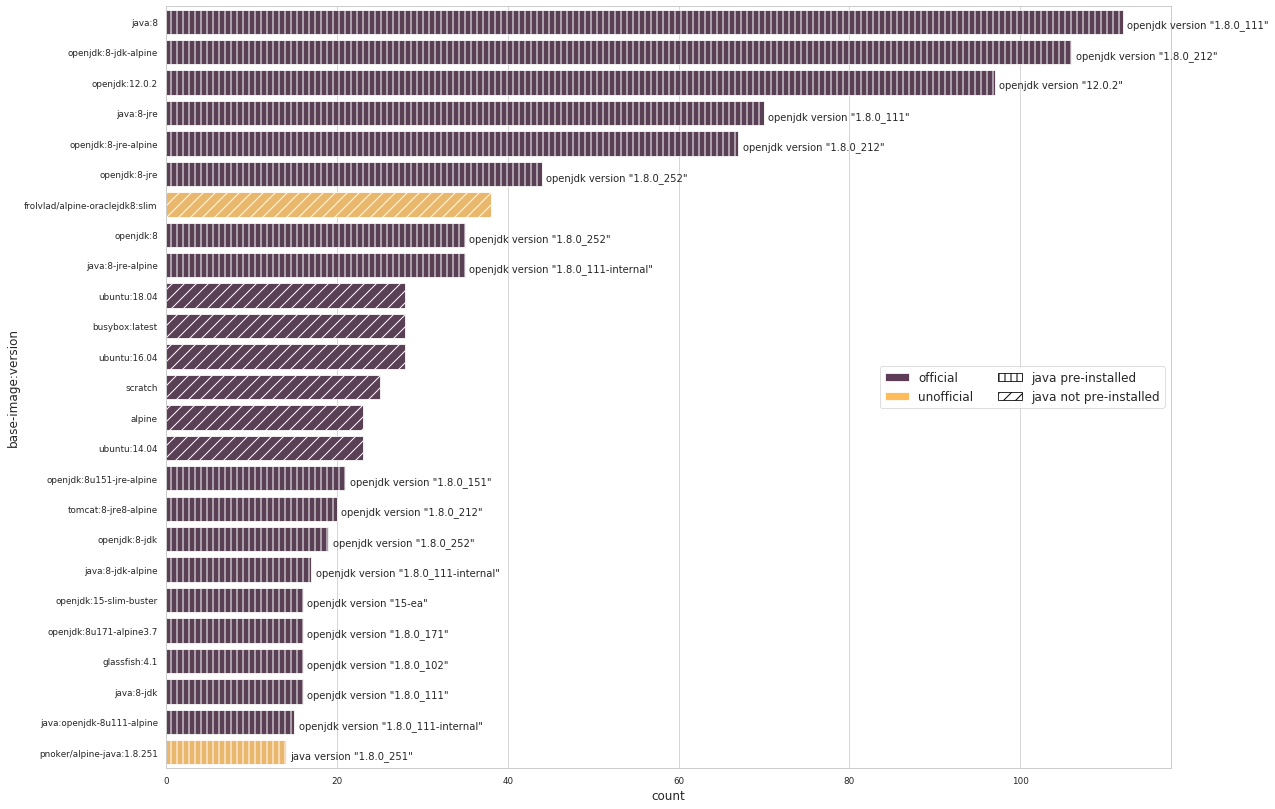

In [38]:
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12})
plt.figure(figsize=(18, 14))
ax = sns.barplot(x="count", y="base-image:version", data=top_25_java_df, palette=mypalette, edgecolor='#ffffff')

for i, thisbar in enumerate(ax.patches):
    thisbar.set_hatch(myhatches[i])

# Java versions
for i, thisbar in enumerate(ax.patches):
    width = thisbar.get_width()
    ax.text(width + 0.5,
            thisbar.get_y() + thisbar.get_height()/2. + 0.2,
            top_25_java_df["java_version"][i],
            fontsize=10,
            ha="left")

official_patch = mpatches.Patch(edgecolor='#ffffff', facecolor='#5e3c58', label='official')
unofficial_patch = mpatches.Patch(edgecolor='#ffffff', facecolor='#ffbc58', label='unofficial')
no_java_patch = mpatches.Patch(edgecolor='#000000', facecolor='#ffffff', label='java not pre-installed', hatch='//')
java_patch = mpatches.Patch(edgecolor='#000000', facecolor='#ffffff', label='java pre-installed', hatch='||')

plt.legend(handles=[official_patch, unofficial_patch, java_patch, no_java_patch], loc='center right', ncol=2, fontsize="medium", frameon=True)

### Plot for paper

In [39]:
# Official vs unofficial
mypalette = []
for i in range(25):
    # Unofficial
    if "/" in top_25_java_df["base-image:version"][i]:
        # No java
        if not top_25_java_df["java_version"][i]:
            mypalette.append("#ffc425")
        # Java
        else:
            mypalette.append("#f37735")
    # Official
    else:
        # No java
        if not top_25_java_df["java_version"][i]:
            mypalette.append("#00aedb")
        # Java
        else:
            mypalette.append("#66023c")

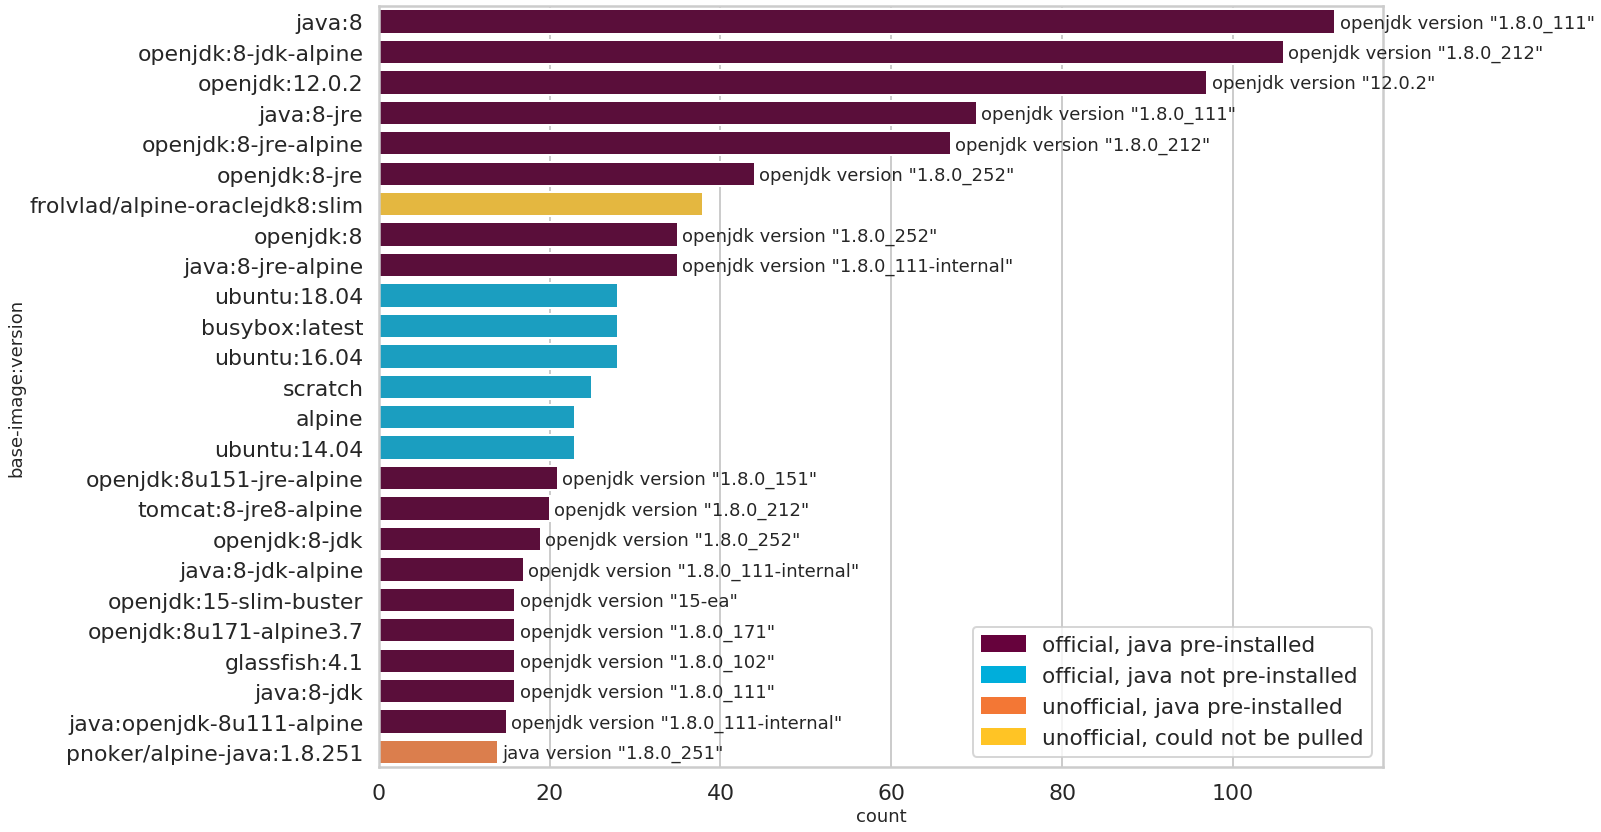

In [40]:
sns.set_style("whitegrid")
sns.set_context("poster", rc={"font.size":18,"axes.titlesize":18,"axes.labelsize":18})
plt.figure(figsize=(18, 14)) 
ax = sns.barplot(x="count", y="base-image:version", data=top_25_java_df, palette=mypalette, edgecolor='#ffffff')

# Java versions
for i, thisbar in enumerate(ax.patches):
    width = thisbar.get_width()
    ax.text(width + 0.5,
            thisbar.get_y() + thisbar.get_height()/2. + 0.2,
            top_25_java_df["java_version"][i],
            fontsize=18,
            ha="left")

official_java_patch = mpatches.Patch(color='#66023c', label='official, java pre-installed')
official_no_java_patch = mpatches.Patch(color='#00aedb', label='official, java not pre-installed')
unofficial_java_patch = mpatches.Patch(color='#f37735', label='unofficial, java pre-installed')
unofficial_no_java_patch = mpatches.Patch(color='#ffc425', label='unofficial, could not be pulled')
plt.legend(handles=[official_java_patch, official_no_java_patch, unofficial_java_patch, unofficial_no_java_patch], loc='lower right', ncol=1, fontsize="large", frameon=True)

### Most popular versions of each base image

In [41]:
versions = []
base_image_version_df = pd.DataFrame({"base_image": "", "versions": versions})
print(base_image_version_df)

Empty DataFrame
Columns: [base_image, versions]
Index: []


In [42]:
for i in range(len(list_of_base_images)):
    output_list = re.split(":", list_of_base_images[i], 1)
    if len(output_list) == 1:
        output_list.append("")
    if output_list[0] not in base_image_version_df["base_image"].values:
        base_image_version_df = base_image_version_df.append(
            {"base_image": output_list[0], "versions": [output_list[1]]}, ignore_index=True)
    if output_list[0] in base_image_version_df["base_image"].values:
        versions = base_image_version_df.loc[(base_image_version_df["base_image"] == output_list[0]), "versions"]
        updated_versions = np.append(versions.values[0], output_list[1])
        # base_image_version_df.loc[base_image_version_df["base_image"] == output_list[0], "versions"] += list(output_list[1])
        base_image_version_df.loc[base_image_version_df["base_image"] == output_list[0], "versions"] = [updated_versions]

base_image_version_df.head()

,base_image,versions
0,maven,"[3.5-jdk-8, 3.5-jdk-8, 3.5.4-jdk-8, 3-jdk-11-s..."
1,openjdk,"[8-jdk-alpine, 8-jdk-alpine, 8-jdk-alpine, 8u2..."
2,jenkins/jenkins,"[latest, latest, lts-alpine, $jenkins_tag, lts..."
3,centos,"[centos6.10, centos6.10, 8, centos7.6.1810, ce..."
4,canal/osbase,"[v2, v2]"


In [43]:
base_image_version_df.to_csv(r'analysis_output/base_image_and_all_versions.csv', index=False)

In [44]:
final_list = []
for i in range(len(base_image_version_df)):
    one_base_image_dict = {}
    one_base_image_dict["base_image"] = base_image_version_df["base_image"][i]
    one_base_image_dict["versions"] = []
    counter = collections.Counter(base_image_version_df["versions"][i]).most_common()
    for version, count in counter:
        one_base_image_dict["versions"].append({"version": version, "count": count})
    final_list.append(one_base_image_dict)
with open("analysis_output/most_popular_versions.json", 'w') as json_file:
    json.dump(final_list, json_file, indent=2)